Ссылка на тестовое задание
https://disk.yandex.ru/d/VRF3a_lMiHqxrQ

In [ ]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
users = pd.read_csv('/content/users.csv')
course_users = pd.read_csv('/content/course_users.csv')
courses = pd.read_csv('/content/courses.csv')
course_types = pd.read_csv('/content/course_types.csv')
lessons = pd.read_csv('/content/lessons.csv')
subjects = pd.read_csv('/content/subjects.csv')
cities = pd.read_csv('/content/cities.csv')
homework_done = pd.read_csv('/content/homework_done.csv')
homework = pd.read_csv('/content/homework.csv')
homework_lessons = pd.read_csv('/content/homework_lessons.csv')
user_roles = pd.read_csv('/content/user_roles.csv')

In [ ]:
query = '''
-- создадим временную табличку, с расчетом количества домашек, потом присоеденим ее к основному запрос
WITH t_homework AS
(
    SELECT user_id, COUNT(*) AS cnt_homework
    FROM homework_done
    GROUP BY user_id
)

SELECT
    uc.course_id,
    c.name AS course_name,
    s.name AS subjects_name,
    s.project AS subjects_type,
    ct.name as course_type_name,
    c.starts_at AS course_data_start,
    uc.user_id,
    u.last_name,
    ci.name AS city_name,
    uc.active,
    CAST(uc.created_at AS DATE) AS date_join_cours, -- используем дату, в которую появилась запись об ученике + его курсе, как дату открытия курса ученику
    FLOOR(uc.available_lessons / c.lessons_in_month) AS cnt_open_month, -- С помощью деления количество открытых уроков на число уроков в месяц получаем количество месяцев,
                                                                        -- которые ученики оплатили,
                                                                        -- floor() используем для округления в меньшую сторону, чтобы получить только полные месяцы
    t.cnt_homework
FROM
    course_users uc
LEFT JOIN
    courses c ON uc.course_id = c.id
LEFT JOIN
    subjects s ON c.subject_id = s.id
JOIN
    users u ON u.id = uc.user_id -- в таблице users есть ученики, которые не присоединилсь к курсу, они нас не интересуют, поэтому используем обычный join
LEFT JOIN
    cities ci ON ci.id = u.city_id
LEFT JOIN
    t_homework t ON uc.user_id = t.user_id
LEFT JOIN
    course_types ct ON ct.id = c.course_type_id
 WHERE s.project in ('ЕГЭ', 'ОГЭ') and ct.name in ('Годовой', 'Годовой 2.0')


 '''

In [ ]:
display(duckdb.query(query).to_df())

,course_id,course_name,subjects_name,subjects_type,course_type_name,course_data_start,user_id,last_name,city_name,active,date_join_cours,cnt_open_month,cnt_homework
0,36,Годовой курс 2к25,Обществознание ОГЭ,ОГЭ,Годовой,2024-09-30,10387,Семенова,Саратов,1,2024-07-30,2.0,11.0
1,98,Погоня за мечтой 2к25,Обществознание,ЕГЭ,Годовой 2.0,2024-11-13,10414,Пищик,Краснодар,1,2024-10-30,1.0,15.0
2,36,Годовой курс 2к25,Обществознание ОГЭ,ОГЭ,Годовой,2024-09-30,10518,Миллер,Омск,1,2024-07-31,2.0,8.0
3,38,Годовой курс 2к25,Математика ОГЭ,ОГЭ,Годовой,2024-09-23,10567,Фельцман,Одинцово,1,2024-08-01,2.0,26.0
4,38,Годовой курс 2к25,Математика ОГЭ,ОГЭ,Годовой,2024-09-23,10570,Бухмарева,Санкт-Петербург,1,2024-07-31,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5878,36,Годовой курс 2к25,Обществознание ОГЭ,ОГЭ,Годовой,2024-09-30,30024,Чудайкина,Благовещенск,1,2024-10-01,3.0,NaN
5879,18,Годовой 2к25 стандарт,История,ЕГЭ,Годовой,2024-09-18,30424,Гусейнов,Одинцово,0,2024-10-02,0.0,NaN
5880,19,Годовой 2к25 стандарт,Русский,ЕГЭ,Годовой,2024-09-21,30433,Гончаров,Краснодар,1,2024-10-03,1.0,NaN
5881,16,Годовой 2к25 стандарт,Обществознание,ЕГЭ,Годовой,2024-09-16,33253,Садкина,Оренбург,0,2024-10-10,0.0,NaN


In [ ]:
df = duckdb.query(query).to_df()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5883 entries, 0 to 5882
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   course_id          5883 non-null   int64         
 1   course_name        5883 non-null   object        
 2   subjects_name      5883 non-null   object        
 3   subjects_type      5883 non-null   object        
 4   course_type_name   5883 non-null   object        
 5   course_data_start  5883 non-null   object        
 6   user_id            5883 non-null   int64         
 7   last_name          5883 non-null   object        
 8   city_name          5540 non-null   object        
 9   active             5883 non-null   int64         
 10  date_join_cours    5883 non-null   datetime64[us]
 11  cnt_open_month     5868 non-null   float64       
 12  cnt_homework       5525 non-null   float64       
dtypes: datetime64[us](1), float64(2), int64(3), object(7)
memory us

Проверяем выгрузку на дубликаты


In [ ]:
df.duplicated().sum()

0

Приводим столбецы course_data_start и date_join_cours к формату datetime64[ns]

In [ ]:
df['course_data_start'] = pd.to_datetime(df['course_data_start'], format='%Y-%m-%d')

In [ ]:
df['date_join_cours'] = df['date_join_cours'].astype('datetime64[ns]')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5883 entries, 0 to 5882
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   course_id          5883 non-null   int64         
 1   course_name        5883 non-null   object        
 2   subjects_name      5883 non-null   object        
 3   subjects_type      5883 non-null   object        
 4   course_type_name   5883 non-null   object        
 5   course_data_start  5883 non-null   datetime64[ns]
 6   user_id            5883 non-null   int64         
 7   last_name          5883 non-null   object        
 8   city_name          5540 non-null   object        
 9   active             5883 non-null   int64         
 10  date_join_cours    5883 non-null   datetime64[ns]
 11  cnt_open_month     5868 non-null   float64       
 12  cnt_homework       5525 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(6)
memory us

С помощью функции info() определяем, что в столбцах cnt_open_month, cnt_homework и city_name есть NULL значения. Для city_name значения NULL заменим на "Другое". Для open_month будем считать, что при NULL открытых месяцев нет.  Для столбца cnt_homework так же занулим NULL-значения.
Воспользуемся функцией fillna()


In [ ]:
df['cnt_open_month'] = df['cnt_open_month'].fillna(0)

In [ ]:
df['cnt_homework'] = df['cnt_homework'].fillna(0)

In [ ]:
df['city_name'] = df['city_name'].fillna('Другое')

In [ ]:
df

,course_id,course_name,subjects_name,subjects_type,course_type_name,course_data_start,user_id,last_name,city_name,active,date_join_cours,cnt_open_month,cnt_homework
0,36,Годовой курс 2к25,Обществознание ОГЭ,ОГЭ,Годовой,2024-09-30,10226,Турова,Воронеж,1,2024-07-29,1.0,6.0
1,38,Годовой курс 2к25,Математика ОГЭ,ОГЭ,Годовой,2024-09-23,10243,Леонтьева,Звенигород,1,2024-07-29,2.0,13.0
2,37,Годовой курс 2к25,Русский ОГЭ,ОГЭ,Годовой,2024-09-25,10319,Сутягина,Саратов,1,2024-10-30,2.0,17.0
3,36,Годовой курс 2к25,Обществознание ОГЭ,ОГЭ,Годовой,2024-09-30,10380,Гирфанова,Казань,1,2024-07-31,1.0,9.0
4,36,Годовой курс 2к25,Обществознание ОГЭ,ОГЭ,Годовой,2024-09-30,10382,Abovyan,Москва,1,2024-10-10,2.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5878,36,Годовой курс 2к25,Обществознание ОГЭ,ОГЭ,Годовой,2024-09-30,30024,Чудайкина,Благовещенск,1,2024-10-01,3.0,0.0
5879,18,Годовой 2к25 стандарт,История,ЕГЭ,Годовой,2024-09-18,30424,Гусейнов,Одинцово,0,2024-10-02,0.0,0.0
5880,19,Годовой 2к25 стандарт,Русский,ЕГЭ,Годовой,2024-09-21,30433,Гончаров,Краснодар,1,2024-10-03,1.0,0.0
5881,16,Годовой 2к25 стандарт,Обществознание,ЕГЭ,Годовой,2024-09-16,33253,Садкина,Оренбург,0,2024-10-10,0.0,0.0


Проверяем на аномальные значения столбцы с количеством выполненного д/з и открытых месяцев. Воспользуемся ящиком с усами.



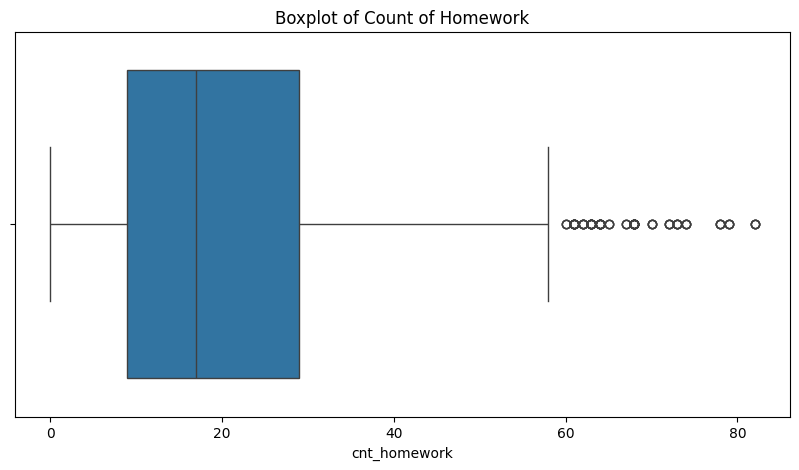

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['cnt_homework'])
plt.title('Boxplot of Count of Homework')
plt.show()

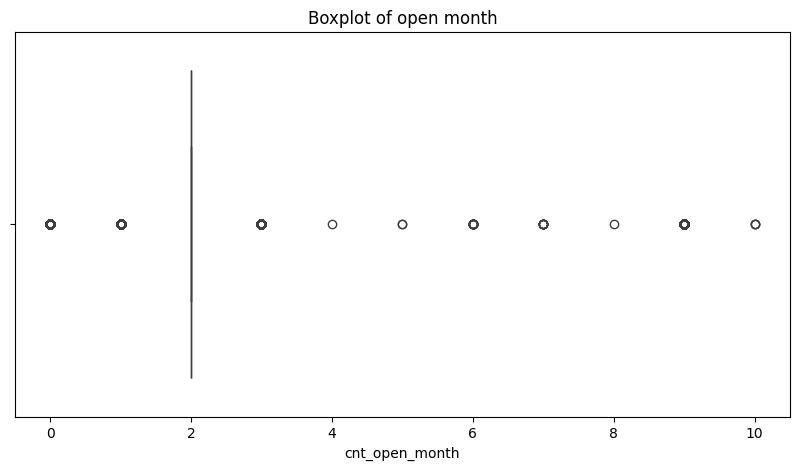

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['cnt_open_month'])
plt.title('Boxplot of open month')
plt.show()

Несмотря на то, что некоторые показатели выходят за доверительный интервал, их можно сохранить. Например для cnt_open_month максимальное значение в 10 месяцев никак не противоречит длительности курсов (в нашем случае 12 месяцев).

Для количества выполненных дз самое экстремальное значение судя по графику равно ~85. Что так же является нормальным для годового курса.

После обработки выгруженных данных разобьем датафрейм на волны

Критерии волн:
• 0 волна – присоединились на курс до даты старта курса включительно

• 1 волна - присоединились на курс в течение 1 недели после даты старта курса включительно

• 2 волна - присоединились на курс в течение от 1 до 2 недель включительно после даты старта курса

• 3 волна - присоединились на курс в течение от 2 до 3 недель включительно после даты старта курса

• 4 волна - присоединились на курс в течение от 3 до 4 недель включительно после даты старта курса

• 5 волна - присоединились на курс от 4 недель после даты старта курса


Найдем разницу между датой старта курса и датой подключения ученика в днях.

In [ ]:
df.columns

Index(['course_id', 'course_name', 'subjects_name', 'subjects_type',
       'course_type_name', 'course_data_start', 'user_id', 'last_name',
       'city_name', 'active', 'date_join_cours', 'cnt_open_month',
       'cnt_homework'],
      dtype='object')

In [ ]:
df['date_diff'] = df['date_join_cours'] - df['course_data_start']

In [ ]:
df.sort_values('date_diff')

,course_id,course_name,subjects_name,subjects_type,course_type_name,course_data_start,user_id,last_name,city_name,active,date_join_cours,cnt_open_month,cnt_homework,date_diff
5815,36,Годовой курс 2к25,Обществознание ОГЭ,ОГЭ,Годовой,2024-09-30,10013,Дьякова,Новосибирск,0,2024-07-26,0.0,0.0,-66 days
2629,36,Годовой курс 2к25,Обществознание ОГЭ,ОГЭ,Годовой,2024-09-30,10068,Боженова,Коркино,0,2024-07-27,0.0,40.0,-65 days
4744,36,Годовой курс 2к25,Обществознание ОГЭ,ОГЭ,Годовой,2024-09-30,10102,Лепешкина,Москва,1,2024-07-27,2.0,21.0,-65 days
4749,36,Годовой курс 2к25,Обществознание ОГЭ,ОГЭ,Годовой,2024-09-30,10139,Gold,Москва,1,2024-07-28,2.0,38.0,-64 days
5648,36,Годовой курс 2к25,Обществознание ОГЭ,ОГЭ,Годовой,2024-09-30,10118,Гаврилова,Барнаул,0,2024-07-28,0.0,0.0,-64 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,86,Годовой 2к25 минимал,Биология,ЕГЭ,Годовой,2024-09-17,10452,Матвеева,Другое,1,2024-11-02,1.0,7.0,46 days
3825,16,Годовой 2к25 стандарт,Обществознание,ЕГЭ,Годовой,2024-09-16,25156,Валиуллина,Нурлат,1,2024-11-03,2.0,5.0,48 days
113,81,Годовой 2к25 минимал,История,ЕГЭ,Годовой,2024-09-18,10968,Сайб,Кандалакша,1,2024-11-05,2.0,24.0,48 days
11,80,Годовой 2к25 минимал,Английский язык,ЕГЭ,Годовой,2024-09-20,25930,Медянская,Нижний Новгород,1,2024-11-09,2.0,18.0,50 days


In [ ]:
df['date_diff'] = df['date_diff'].dt.days

In [ ]:
df['wave'] = 0  # Инициализация столбца
df.loc[(df['date_diff'] < 0), 'wave'] = 0
df.loc[(df['date_diff'] > 0) & (df['date_diff'] <= 7), 'wave'] = 1
df.loc[(df['date_diff'] > 7) & (df['date_diff'] <= 14), 'wave'] = 2
df.loc[(df['date_diff'] > 14) & (df['date_diff'] <= 21), 'wave'] = 3
df.loc[(df['date_diff'] > 21) & (df['date_diff'] <= 28), 'wave'] = 4
df.loc[df['date_diff'] > 28, 'wave'] = 5

In [ ]:
df

,course_id,course_name,subjects_name,subjects_type,course_type_name,course_data_start,user_id,last_name,city_name,active,date_join_cours,cnt_open_month,cnt_homework,date_diff,wave
0,36,Годовой курс 2к25,Обществознание ОГЭ,ОГЭ,Годовой,2024-09-30,10226,Турова,Воронеж,1,2024-07-29,1.0,6.0,-63,0
1,38,Годовой курс 2к25,Математика ОГЭ,ОГЭ,Годовой,2024-09-23,10243,Леонтьева,Звенигород,1,2024-07-29,2.0,13.0,-56,0
2,37,Годовой курс 2к25,Русский ОГЭ,ОГЭ,Годовой,2024-09-25,10319,Сутягина,Саратов,1,2024-10-30,2.0,17.0,35,5
3,36,Годовой курс 2к25,Обществознание ОГЭ,ОГЭ,Годовой,2024-09-30,10380,Гирфанова,Казань,1,2024-07-31,1.0,9.0,-61,0
4,36,Годовой курс 2к25,Обществознание ОГЭ,ОГЭ,Годовой,2024-09-30,10382,Abovyan,Москва,1,2024-10-10,2.0,20.0,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5878,36,Годовой курс 2к25,Обществознание ОГЭ,ОГЭ,Годовой,2024-09-30,30024,Чудайкина,Благовещенск,1,2024-10-01,3.0,0.0,1,1
5879,18,Годовой 2к25 стандарт,История,ЕГЭ,Годовой,2024-09-18,30424,Гусейнов,Одинцово,0,2024-10-02,0.0,0.0,14,2
5880,19,Годовой 2к25 стандарт,Русский,ЕГЭ,Годовой,2024-09-21,30433,Гончаров,Краснодар,1,2024-10-03,1.0,0.0,12,2
5881,16,Годовой 2к25 стандарт,Обществознание,ЕГЭ,Годовой,2024-09-16,33253,Садкина,Оренбург,0,2024-10-10,0.0,0.0,24,4


In [ ]:
df.to_csv('land_testovoe.csv')